# Restaurant Data Analysis and Predictive Modelling Project

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

sns.set
np.random.seed(42)

In [2]:
# Load the Data
rest_data = pd.read_csv("C:/Users/JEETECH/Documents/Tech/Python/Udemy - Linear Regression/ML+Practical+task+3/ML Practical task 3/Restaurant_revenue.csv", header=0)
rest_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [3]:
# Check for and Handle Missing Values

rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [4]:
# Use the df.isna.sum() to cross-check

rest_data.isna().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

#### There are no null/missing values in the dataset

In [5]:
# Cuisine type is an object data type and might be difficult to handle if not properly converted to integer dummy variables

cuisine_dummies = pd.get_dummies(rest_data['Cuisine_Type'], prefix='Cuisine', drop_first=True).astype(int)
rest_data = rest_data.drop('Cuisine_Type', axis=1)
rest_data = pd.concat([rest_data, cuisine_dummies], axis=1)
rest_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1,0,0


In [6]:
# Detect and Handle Outliers

rest_data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172,0.23200,0.262000,0.250000
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950,0.42232,0.439943,0.433229
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809,0.00000,0.000000,0.000000
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642,0.00000,0.000000,0.000000
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964,0.00000,0.000000,0.000000
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793,0.00000,1.000000,0.250000
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332,1.00000,1.000000,1.000000


In [7]:
rest_data[rest_data['Monthly_Revenue'] <=0]


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
54,11,32.620334,5.061169,33.761979,1,87,-28.977809,0,0,0
104,10,11.313867,2.279133,16.075447,1,24,-27.610276,1,0,0
110,17,22.458927,0.874713,35.280768,1,57,-25.453430,0,0,0
605,13,36.130521,0.811175,43.119059,1,12,-28.920890,0,0,1
735,10,33.087409,6.009788,15.333779,1,31,-7.627382,0,0,0


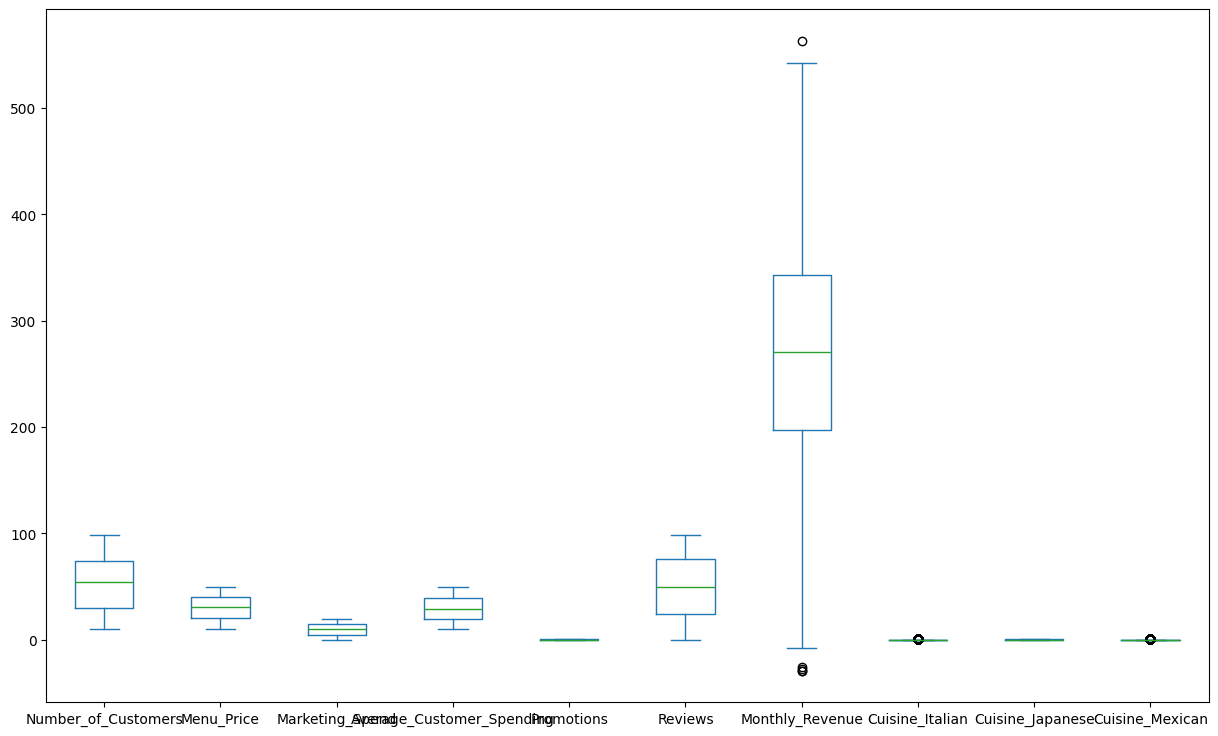

In [8]:
rest_data.plot(kind='box', figsize=(15, 9))

plt.show()

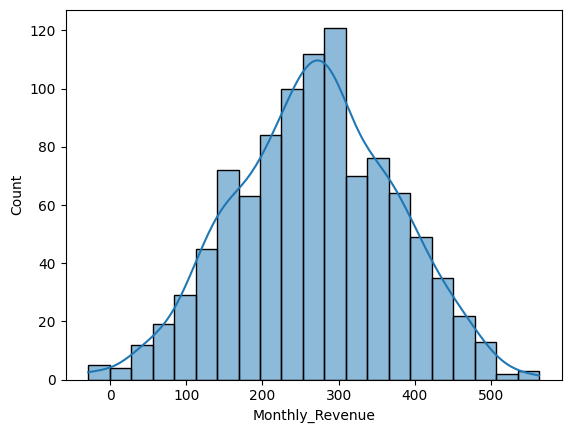

In [9]:
sns.histplot(data=rest_data['Monthly_Revenue'], kde=True)

plt.show()

### Monthly_Revenue Column has a serious issue. Its impossible for revenue to be a negative figure.
There could have been data entry or other kinds of errors leading to these values. 

The fact that it has normal distribution further lends credence to the suspicion of data entry error. 

As such, we shall be imputing 0 to these records.

In [10]:
# Imputing the data

rest_data.loc[rest_data['Monthly_Revenue'] <= 0, 'Monthly_Revenue'] = 0
rest_data[rest_data['Monthly_Revenue'] <= 0]

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
54,11,32.620334,5.061169,33.761979,1,87,0.0,0,0,0
104,10,11.313867,2.279133,16.075447,1,24,0.0,1,0,0
110,17,22.458927,0.874713,35.280768,1,57,0.0,0,0,0
605,13,36.130521,0.811175,43.119059,1,12,0.0,0,0,1
735,10,33.087409,6.009788,15.333779,1,31,0.0,0,0,0


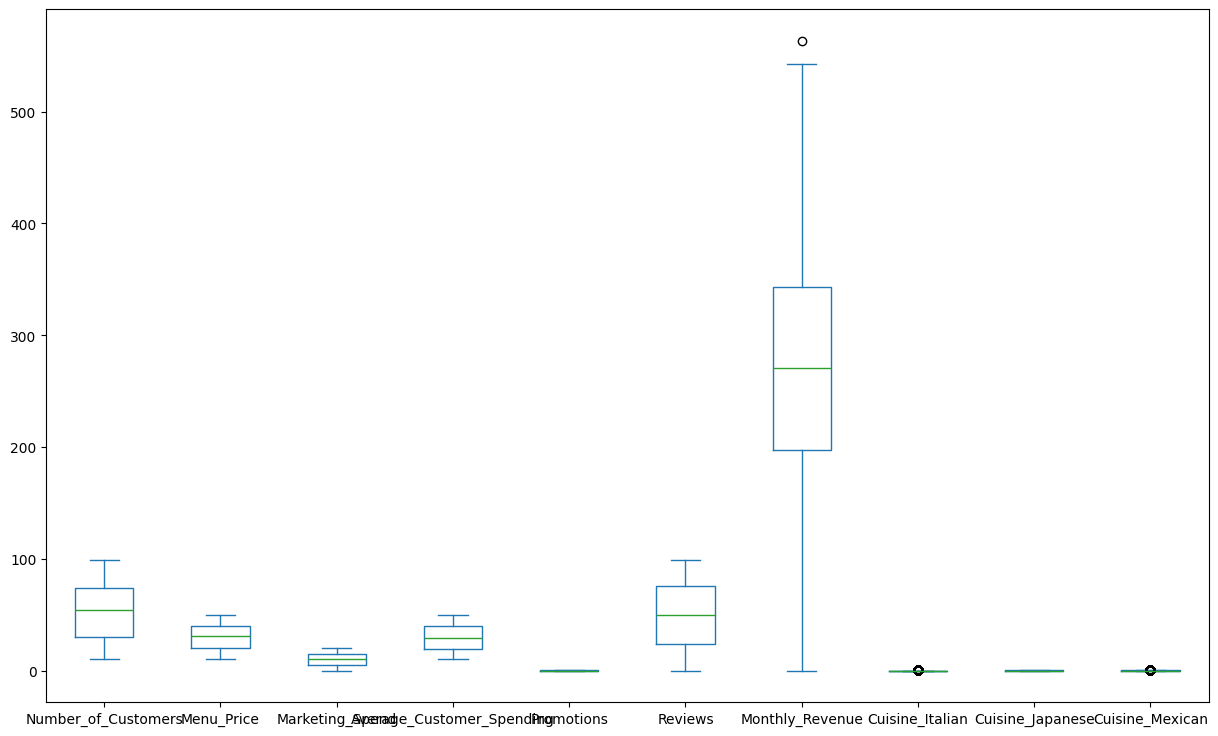

In [11]:
# Confirm Imputation
rest_data.plot(kind='box', figsize=(15, 9))

plt.show()

The outliers in the Monthly_Revenue column have been successfully treated. 

## PART 1: DATA ANALYSIS
Each record represents a unique dish/menu item in the restaurant.

A. Top Performers:

    1. Top 5 most popular dishes? (Menu items/distinct records with the highest patronage per month i.e., highest Number_of_Customers) 
    2. Where are customers spending the most money? (Menu items with the highest average_customer spend) 
    3. Which top 5 dishes account for most of our monthly revenue? (Menu items with the highest monthly_revenue)

B. Cuisine-level analysis

    4. Best performing cuisine (Cuisine with the highest number of customers)
    5. Least performing cuisine (Cuisine with the lowest monthly revenue and average customer spending)


C. Promotion Effectiveness

    7. Impact of promotions on revenue (Dishes that are promoted vs those not promoted)
    

D. Marketing Spend v. Revenue

    8. Does a higher Marketing_Spend equate to increased sales?

#### A. Top Performers

In [12]:
# 1. Top 5 Most Popular dishes

most_popular_dishes = rest_data.sort_values(by='Number_of_Customers', ascending=False).head(5)
most_popular_dishes[['Number_of_Customers', 'Menu_Price','Marketing_Spend','Average_Customer_Spending','Monthly_Revenue']]

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Monthly_Revenue
359,99,46.148959,15.966884,18.395905,459.069742
879,99,43.274525,15.660333,43.800489,412.826704
951,99,10.915753,16.466189,29.841709,442.920701
425,99,19.547601,4.886799,32.816380,319.865501
426,99,47.203614,2.258864,33.262568,394.439348


In [13]:
# 2. Dishes with the highest average_customer spend
highest_avg_spend_dishes = rest_data.sort_values(by='Average_Customer_Spending', ascending=False).head(5)
highest_avg_spend_dishes[['Number_of_Customers', 'Menu_Price','Marketing_Spend','Average_Customer_Spending','Monthly_Revenue']]

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Monthly_Revenue
713,58,16.495276,9.557569,49.900725,271.884740
774,61,43.886694,12.042340,49.872367,367.171101
681,72,27.854746,11.604430,49.820439,313.494869
206,11,15.291048,1.056079,49.818966,138.269645
313,63,42.159079,1.776805,49.751359,230.312958


In [14]:
# 3. Top Dishes with the most revenue

highest_earning_dishes = rest_data.sort_values(by='Monthly_Revenue', ascending=False).head(5)
highest_earning_dishes[['Number_of_Customers', 'Menu_Price','Marketing_Spend','Average_Customer_Spending','Promotions', 'Monthly_Revenue']]

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Monthly_Revenue
84,96,16.620820,16.610689,12.284687,0,563.381332
894,92,23.342782,18.143996,23.433739,1,542.467282
729,83,41.820415,19.994276,39.634771,0,539.371604
308,95,45.399934,19.347124,39.496398,0,522.766636
507,99,44.724913,17.545235,29.694492,0,518.327003


#### B. Cuisine-level Performance

In [15]:
# 4. Best performing cuisine (By total customers, monthly revenue and average spend)

popular_cuisines = rest_data.groupby(['Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican']).agg(
                    Total_Customers=('Number_of_Customers', 'sum'),
                    Total_Monthly_Rev=('Monthly_Revenue','sum'),
                    Avg_group_spend=('Average_Customer_Spending', 'mean')
                    ).sort_values(by='Total_Customers',ascending=False)
popular_cuisines

# Return a proper dataframe with the Cuisines as columns

cuisine_cols = ['Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican']

cuisine_indicators = rest_data[cuisine_cols]

# Transpose the cuisine_indicators so they're in a column
total_metrics = pd.DataFrame({
                'Total_Customers': cuisine_indicators.T.dot(rest_data['Number_of_Customers']),
                'Total_Monthly_Revenue': cuisine_indicators.T.dot(rest_data['Monthly_Revenue']),
                'Avg_Group_Spend': cuisine_indicators.T.dot(rest_data['Average_Customer_Spending'])
})


# Clean up the index names
total_metrics.index = total_metrics.index.str.replace('Cuisine_', '')
total_metrics.index.name = 'Cuisine'


best_performing_cuisine = total_metrics.sort_values(
    by='Total_Customers', ascending=False
).head(1)

best_performing_cuisine

,Total_Customers,Total_Monthly_Revenue,Avg_Group_Spend
Cuisine,,,
Japanese,14141,71185.448715,7803.52586


In [16]:
# 5. Least performing cuisine
lowest_earning_cuisine = total_metrics.sort_values(by='Total_Monthly_Revenue', ascending=True).head(1)
lowest_earning_cuisine

,Total_Customers,Total_Monthly_Revenue,Avg_Group_Spend
Cuisine,,,
Italian,12243,61205.978247,6786.338947


#### C. Promotion Effectiveness

In [17]:
# 6. Impact of Promotion on Revenue (Dishes)
promoted_dishes = rest_data.loc[rest_data['Promotions']== 1]

non_promoted_dishes = rest_data.loc[rest_data['Promotions'] == 0]


promoted_avg = promoted_dishes.groupby('Promotions').agg(
    avg_monthly_revenue=('Monthly_Revenue', 'mean'),
    avg_customer_spend=('Average_Customer_Spending', 'mean')
    ).sort_values(by='avg_monthly_revenue', ascending=False)

non_promoted_avg = non_promoted_dishes.groupby('Promotions').agg(
    avg_monthly_revenue=('Monthly_Revenue', 'mean'),
    avg_customer_spend=('Average_Customer_Spending', 'mean')
    ).sort_values(by='avg_monthly_revenue', ascending=False)



print("Dishes with Promos:", promoted_dishes.shape[0])
print("Dishes without Promos:", non_promoted_dishes.shape[0])
print("\nAverage Monthly Revenue (Promoted):\n", promoted_avg)
print("\nAverage Monthly Revenue (Non-Promoted):\n", non_promoted_avg)

Dishes with Promos: 497
Dishes without Promos: 503

Average Monthly Revenue (Promoted):
             avg_monthly_revenue  avg_customer_spend
Promotions                                         
1                    270.517416           29.553442

Average Monthly Revenue (Non-Promoted):
             avg_monthly_revenue  avg_customer_spend
Promotions                                         
0                    267.188084           29.401639


#### Insights:

Promoted dishes generated a slightly higher monthly revenue (*$270.5* vs. *$267.8*) with a difference of about *$3.33*. The almost identical average customer spend for promoted and non-promoted dishes indicates that promos had minimal impact on individual spending behavior. The increased revenue may be more attributable to volume effects rather than increased spending per customer. 

In [18]:

# 7. Impact of Promotion on Revenue (Cuisine-level)
promoted_cuisine_cols = [
    'Number_of_Customers',
    'Marketing_Spend',
    'Average_Customer_Spending',
    'Promotions',
    'Monthly_Revenue'
]


# Define the list of cuisine indicator columns
cuisine_indicator_cols = ['Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican']

# List to store aggregated data for cuisine/promotion combinations
combined_cuisine_performance = []

# Loop through each cuisine type and extract and clean the name
for cuisine_col in cuisine_indicator_cols:
    cuisine_name = cuisine_col.replace('Cuisine_', '')

    # Loop through and each promotion status
    for promo_status in [0, 1]:
        filtered_data = rest_data[
            (rest_data[cuisine_col] == 1) &
            (rest_data['Promotions'] == promo_status)
        ]

        # Calculate the sums for the specific cuisines and promotion status
        total_customers = filtered_data['Number_of_Customers'].sum()
        total_monthly_revenue = filtered_data['Monthly_Revenue'].sum()
        num_dishes = len(filtered_data) #  This returns the number of dishes (promoted vs. non-promoted)

        # Append the results to the combined cuisines list
        combined_cuisine_performance.append({
            'Cuisine': cuisine_name,
            'Number_of_Dishes': num_dishes,
            'Promotions': promo_status,
            'Total_Customers': total_customers,
            'Total_Monthly_Revenue': total_monthly_revenue
        })

# Convert to a data frame
cuisine_performance = pd.DataFrame(combined_cuisine_performance)

# Optional: Sort for better readability (e.g., by Cuisine and then Promotions)
cuisine_performance = cuisine_performance.sort_values(
    by=['Total_Customers', 'Total_Monthly_Revenue'], ascending=[False, False]
)

cuisine_performance

,Cuisine,Number_of_Dishes,Promotions,Total_Customers,Total_Monthly_Revenue
2,Japanese,140,0,7355,37192.062023
5,Mexican,129,1,6984,34784.712719
3,Japanese,122,1,6786,33993.386692
1,Italian,116,1,6529,31348.275341
4,Mexican,121,0,6221,32585.728594
0,Italian,116,0,5714,29857.702906


### Insights:
From the Analysis above, we can see that:

a. Japanese cuisine had the most number of dishes that had promos (140) and in spite of this attracted (7,355 paying customers) and raked in a total monthly revenue of *$37,192.06*. promoted dishes (122) raked in *$33,993.38* from 6,786 customers. This is an indication that Japanese cuisine is popular in the restaurant and does not require promos to boost patronage and sales.

b.  Mexican dishes with promos (129) outperformed Mexican dishes which didnt have promos (121) in customers (marginally as dishes with promos attracted 6,984 customers and raked in *$34,784.71* compared to non-promoted dishes which attracted 6,221 customers and *$32,585.72* in revenue). The effects of promotion on Mexican dishes is marginal.


c. Italian dishes with promos (116) attracted 6,529 paying customers and generated *$31,348.27* in total monthly revenue. non-promoted Italian dishes (116) attracted 5,714 customers with monthly revenue of *$29,857.70*.

The effects of promotions are more effective in the Italian cuisines. Promotions are therefore, more needed for Italian and Mexican dishes in order to increase monthly revenues. 

#### D. Marketing Spend v. Revenue

In [19]:
# 8. Impact of Marketing Spend on Monthly Revenue 
cuisine_columns = ['Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican']

indicators = rest_data[cuisine_columns]
market_spend_metrics = pd.DataFrame({
    'total_market_spend': indicators.T.dot(rest_data['Marketing_Spend']),
    'total_monthly_revenue': indicators.T.dot(rest_data['Monthly_Revenue'])
})


market_spend_metrics.index = market_spend_metrics.index.str.replace('Cuisine_', '', regex=False)
market_spend_metrics.index.name = 'Cuisine'

marketing_spend_performance = market_spend_metrics.sort_values(by=['total_market_spend', 'total_monthly_revenue'], ascending=[False, False])

marketing_spend_performance


,total_market_spend,total_monthly_revenue
Cuisine,,
Japanese,2700.109694,71185.448715
Italian,2338.523561,61205.978247
Mexican,2337.238677,67370.441313


### Insights:
Marketing spend influences revenue but has diminishing results at the micro level. 

We observe a significant increase in monthly revenue where marketing spend is the highest; a difference 0f ~$9,979 between Japanese and Italian cuisine for a marketing spend difference of ($361.59). However, a marginal difference between the marketing spend for Italian cuisine and Mexican cuisine ($1.29) did not yield a higher revenue for Italian cuisine. 

This suggests that although higher marketing spend can drive sales, small increases in marketing spend are not sufficient. Other operational or product factors most likely play a role at the microeconomic level. 

## PART 2: PREDICTIVE MODELLING

The Goals of this section are to:
    
    1. Find out the independent variables(features) that directly impact the independent variable (Monthly Revenue). 
        a. Correlation Matrix
        b. Visualise Matrix
    
    2. Build machine learning models that accurately predict the Monthly revenue based on the other variables
        a. Split the data into training (70%) and test (30%) sets
        b. Build ML Models:
            i. Simple Linear Regression
            ii. Multiple Linear Regression (OLS)
            iii. LassoCV 
            iv. RidgeCV
            v. Decision Tree Regression
            vi. Random Forest Regression
            vii. Gradient Boosting Regression
        c. Evaluate and visualise the metric (r2 or mse) performance of each model 

In [20]:
# 1a. Correlation Matrix

rest_data.corr()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
Number_of_Customers,1.000000,0.033470,-0.007024,-0.013898,0.058693,-0.010140,0.745785,-0.010417,0.015879,-0.009881
Menu_Price,0.033470,1.000000,0.016319,0.020808,0.022068,0.003792,0.259995,-0.063235,-0.010967,0.036288
Marketing_Spend,-0.007024,0.016319,1.000000,-0.058586,-0.041838,-0.031470,0.269315,0.011394,0.035390,-0.060255
Average_Customer_Spending,-0.013898,0.020808,-0.058586,1.000000,0.006620,0.054163,-0.035617,-0.010815,0.015972,-0.036313
Promotions,0.058693,0.022068,-0.041838,0.006620,1.000000,-0.021635,0.016067,0.003298,-0.037361,0.021940
Reviews,-0.010140,0.003792,-0.031470,0.054163,-0.021635,1.000000,-0.025252,0.037372,0.023255,-0.056625
Monthly_Revenue,0.745785,0.259995,0.269315,-0.035617,0.016067,-0.025252,1.000000,-0.026651,0.016432,0.003561
Cuisine_Italian,-0.010417,-0.063235,0.011394,-0.010815,0.003298,0.037372,-0.026651,1.000000,-0.327481,-0.317324
Cuisine_Japanese,0.015879,-0.010967,0.035390,0.015972,-0.037361,0.023255,0.016432,-0.327481,1.000000,-0.344003
Cuisine_Mexican,-0.009881,0.036288,-0.060255,-0.036313,0.021940,-0.056625,0.003561,-0.317324,-0.344003,1.000000


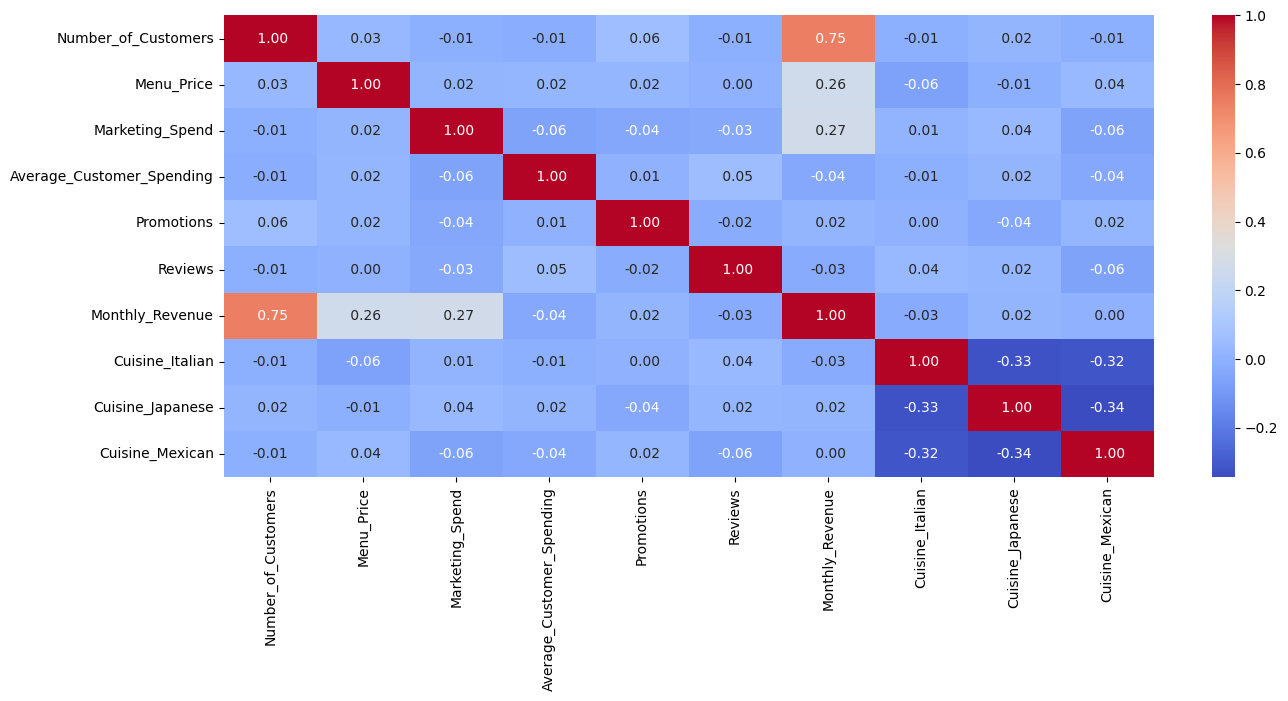

In [21]:
# 1b. Visualize the Matrix

plt.figure(figsize=(15, 6))
sns.heatmap(rest_data.corr(), cmap='coolwarm', annot=True, fmt=' .2f')

plt.show()

### Insight:

Number of Customers is highly positively correlated with the Monthly Revenue. 

This indicates that Monthly Revenue grows when the number of customers increases. 

In [22]:
# 2. Split the data into training and test sets

rest_data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,1,0,0


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


X = rest_data.drop('Monthly_Revenue', axis=1)
y = rest_data['Monthly_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 9) (300, 9) (700,) (300,)


### i. Simple Linear Regression

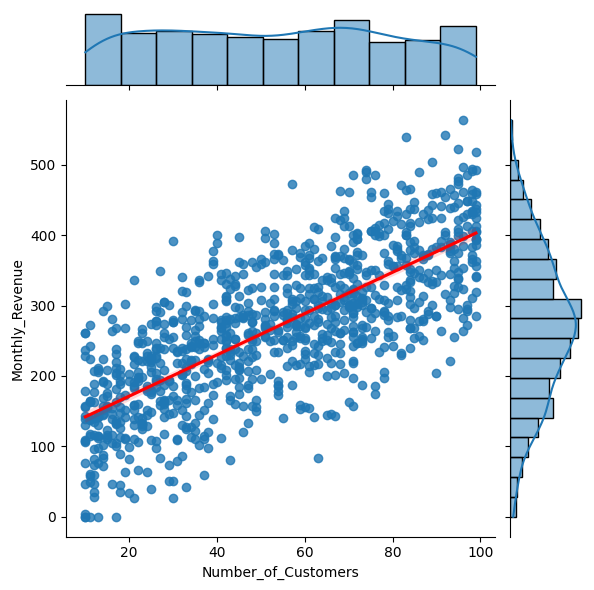

In [24]:

#   We already established that the Number of customers is highly correlated with the Monthly revenue so lets calculate a simple linear regression and evaluate

sns.jointplot(data=rest_data, x='Number_of_Customers', y='Monthly_Revenue', kind='reg', line_kws={'color':'red'})


We can see a clear postitive correlation between the Number of custmers and the monthly revenue but we need to find out the coefficient (the value of the y when number of customers is 0) and the intercept (the unit of increase we would observe in the y [monthly revenue] for each unit increase in the number of customers)

In [25]:
# Simple Linear Regression model
#Pipeline chains preprocessing (scaling) and modeling in an efficient manner before training the model
 
from sklearn.pipeline import make_pipeline

linear_pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Train the model
linear_reg_lm = linear_pipeline.fit(X_train, y_train)

# Access the LinearRegression model inside the pipeline
linear_model = linear_reg_lm.named_steps['linearregression']

# Make prediction
y_pred_linear = linear_reg_lm.predict(X_test)
y_pred_linear_train = linear_reg_lm.predict(X_train)

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)
r2_linear_train = r2_score(y_train, y_pred_linear_train)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
rmse_linear = np.sqrt(mse_linear)
rmse_linear_train = np.sqrt(mse_linear_train)


print('Linear Regression Model Results:')
print('Coefficient (LinearRegression):', linear_model.coef_) # You cant use the df.coef_ on Pipleine objects, it has to be on the model
print('Intercept (LinearRegression):', linear_model.intercept_)
print('R-squared Score Test (LinearRegression):', r2_linear)
print('R-squared Score Train (LinearRegression):', r2_linear_train)
print('Mean Squared Error Test (LinearRegression):', mse_linear)
print('Mean Squared Error Train (LinearRegression):', mse_linear_train)
print('Root Mean Squared Error Test (LinearRegression):', rmse_linear)
print('Root Mean Squared Error Train (LinearRegression):', rmse_linear_train)

Linear Regression Model Results:
Coefficient (LinearRegression): [74.70320751 23.29503653 28.61320525 -2.35916918 -0.43661874  1.08268893
  0.89481472  1.42633776  2.22758294]
Intercept (LinearRegression): 269.65913851209757
R-squared Score Test (LinearRegression): 0.697114521570185
R-squared Score Train (LinearRegression): 0.6786926466516888
Mean Squared Error Test (LinearRegression): 3566.2918585223915
Mean Squared Error Train (LinearRegression): 3305.277159725792
Root Mean Squared Error Test (LinearRegression): 59.718438178860566
Root Mean Squared Error Train (LinearRegression): 57.49153989697782


### Insights:

1. Coefficients: The coefficients for each of the features in the dataframe is such that for every 1 standard deviation in each feature, the monthly revenue is expected to increase by their returned value attached to that feature. Hence the 3 positive and relevant variables are NUmber_of_Customers (74.70320751), Menu_Price(23.29503653) and Marketing_Spend (28.61320525)

2. Intercept: the value of the target variable (Monthly revenue) when all other independent variabels are at their mean is 269.65 (because of the scaling).

3. Rsquared score on the Test Set: indicates that the model explains 69.71% of the variations in the data. This means the model is fairly good at predicting changes in the monthly revenue.

4. The Root Mean Squared Error for the test set indicates a residual error of *$59.71* which means that on avearge the models predictions are about *$59.71* off from the actual monthly revenue values. This level of error appears to be reasonable considering the distribution of monthly revenue in the dataset.  


### ii. Multiple Linear Regression (OLS)

In [26]:


# Initialise the StandardScaler()
scaler = StandardScaler()

# Scale the X_train and test sets using the scaler - for more accurate results (All features now have a similar scale)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit(X_test)


# Convert the scaled features back to a Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Add constants to the X
X_train_scaled_constant = sm.add_constant(X_train_scaled)
X_test_scaled_constant = sm.add_constant(X_test_scaled)

# Run the OLS operation on the features with a constant & train the model
model = sm.OLS(y_train, X_train_scaled_constant)
ols_model = model.fit()


print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Monthly_Revenue   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sat, 12 Jul 2025   Prob (F-statistic):          1.34e-163
Time:                        21:48:32   Log-Likelihood:                -3829.4
No. Observations:                 700   AIC:                             7679.
Df Residuals:                     690   BIC:                             7724.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Insights:

1. R Squared & Adjusted R squared Values: Indicate that the model explains 67.9% and 67.5% of the variance in the data.

2. Probability (F-statistic): being 1.34e-163 which is extremely small (0.0000000000000000134) which is very close to 0, indicates that at least one of the varibales in the model is useful in predicting the monthly revenue. 

3. Significant Variables: these are variables whose P>|t| are < 0.05, making them the most statistically relevant features:

    a. Number_of_Customers (0.000)

    b. Menu_Price (0.000)

    c. Marketing_Spend (0.000)

4. Coefficient: 
    a. Number of customers has the largest positive impact on monthly revenue. For each standard deviation increase in the number of customers, we expect the monthly revenue to increase by 74.661 units. 

    b. Marketing Spend: for every 1 standard deviation increase in the marketing spend, the monthly revenue increases by 28.6132
        
    c. Menu price: For every 1 standard deviation increase in the 

5. Multi-collinearity: Condition Number (Cond No.) is very low (1.95) (significantly lower than 30) is excellent and indicates that there is no issue of multicollinearity amongst the independent variables. Hence the coefficients are very stable and reliable. 

### iii. RidgeCV

In [27]:
# Scale the Features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Test and confirm the best alpha for the Ridge model
alphas = np.logspace(-3, 3, 100)


# Initialize and train the model
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)


# Make Predictions
ridge_pred = ridge_cv.predict(X_test_scaled)
ridge_pred_train = ridge_cv.predict(X_train_scaled)


# Evaluate the Model
r2_ridge = r2_score(y_test, ridge_pred)
r2_ridge_train = r2_score(y_train, ridge_pred_train)
mse_ridge = mean_squared_error(y_test, ridge_pred)
mse_ridge_train = mean_squared_error(y_train, ridge_pred_train)
rmse_ridge = np.sqrt(mse_ridge)
rmse_ridge_train = np.sqrt(mse_ridge_train)


print("Ridge Regression Results:")
print("Coefficients (RidgeCV):", ridge_cv.coef_)
print("Intercept (RidgeCV):", ridge_cv.intercept_)
print("R-Squared Score Test (RidgeCV):", r2_ridge)
print("R-Squared Score Train (RidgeCV):", r2_ridge_train)
print("Mean Squared Error Test (RidgeCV):", mse_ridge)
print("Mean Squared Error Train (RidgeCV):", mse_ridge_train)
print("Root Mean Squared Error (RidgeCV):", rmse_ridge)
print("Root Mean Squared Error Train (RidgeCV):", rmse_ridge_train)

Ridge Regression Results:
Coefficients (RidgeCV): [73.90098709 23.07461245 28.29334638 -2.33199521 -0.43566246  1.10183192
  0.84052695  1.38189096  2.14931513]
Intercept (RidgeCV): 269.65913851209757
R-Squared Score Test (RidgeCV): 0.6965039766853137
R-Squared Score Train (RidgeCV): 0.6786151827388419
Mean Squared Error Test (RidgeCV): 3573.480652331415
Mean Squared Error Train (RidgeCV): 3306.074028204424
Root Mean Squared Error (RidgeCV): 59.77859694181033
Root Mean Squared Error Train (RidgeCV): 57.49846979011201


### iv. LassoCV

In [28]:
# Properly Scale the features 
scaler = StandardScaler()

X_train_scaled_lasso = scaler.fit_transform(X_train)
X_test_scaled_lasso = scaler.transform(X_test)

# Set the hyperparameters for the alpha
alphas = np.logspace(-3, 3, 100) # generates 100 values logarithmically spaced starting from 0.001 &ending at 1000

# Initialize the Lasso CV and train the model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, n_jobs=-1)
lasso_cv.fit(X_train_scaled_lasso, y_train)


# Make predictions
lasso_pred = lasso_cv.predict(X_test_scaled_lasso)
lasso_pred_train = lasso_cv.predict(X_train_scaled_lasso)

# Evaluations
r2_lasso = r2_score(y_test, lasso_pred)
r2_lasso_train = r2_score(y_train, lasso_pred_train)
mse_lasso = mean_squared_error(y_test, lasso_pred)
mse_lasso_train = mean_squared_error(y_train, lasso_pred_train)
rmse_lasso = np.sqrt(mse_lasso)
rmse_lasso_train = np.sqrt(mse_lasso_train)
best_alpha_lasso = lasso_cv.alpha_  ## return the best regularization parameter



print("LassoCV Regression Results:")
print("Best Parameter (LassoCV):", best_alpha_lasso)
print("Coefficients (LassoCV):", lasso_cv.coef_)
print("Intercept (LassoCV):", lasso_cv.intercept_)
print("R-Squared Test (LassoCV):", r2_lasso)
print("R-Squared Train (LassoCV):", r2_lasso_train)
print("Mean Squared Error Test (LassoCV):", mse_lasso)
print("Mean Squared Error Train (LassoCV):", mse_lasso_train)
print("Root Mean Squared Error Test (LassoCV):", rmse_lasso)
print("Root Mean Squared Error Train (LassoCV):", rmse_lasso_train)

LassoCV Regression Results:
Best Parameter (LassoCV): 1.873817422860385
Coefficients (LassoCV): [72.83089792 21.46284335 26.7508097  -0.50740392 -0.          0.
 -0.          0.          0.        ]
Intercept (LassoCV): 269.65913851209757
R-Squared Test (LassoCV): 0.6959438222888875
R-Squared Train (LassoCV): 0.6768546200826528
Mean Squared Error Test (LassoCV): 3580.076128858868
Mean Squared Error Train (LassoCV): 3324.184872774668
Root Mean Squared Error Test (LassoCV): 59.83373738000049
Root Mean Squared Error Train (LassoCV): 57.65574449068079


### v. Decision Tree

In [29]:
# Import the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


#Initialize the model 
decision_tree = DecisionTreeRegressor(random_state=42)


# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1)

# Train the model
grid_search_dt.fit(X_train_scaled, y_train)


# Make Predictions
decision_tree_pred = grid_search_dt.predict(X_test_scaled)
decision_tree_pred_train = grid_search_dt.predict(X_train_scaled)


# Evaluate Model
r2_dt = r2_score(y_test, decision_tree_pred)
r2_dt_train = r2_score(y_train, decision_tree_pred_train)
mse_dt = mean_squared_error(y_test, decision_tree_pred)
mse_dt_train = mean_squared_error(y_train, decision_tree_pred_train)
rmse_dt = np.sqrt(mse_dt)
rmse_dt_train = np.sqrt(mse_dt_train)

print("Decision Tree Regression Results:")
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Estimator (Decision Tree):", grid_search_dt.best_estimator_)
print("Best Score (Decision Tree):", grid_search_dt.best_score_)
print("R-Squared Test (Decision Tree):", r2_dt)
print("R-Squared Train (Decision Tree):", r2_dt_train)
print("Mean Squared Error Test (Decision Tree):", mse_dt)
print("Mean Squared Error Train(Decision Tree):", mse_dt_train)
print("Root Mean Squared Error Test (Decision Tree):", rmse_dt)
print("Root Mean Squared Error Train (Decision Tree):", rmse_dt_train)

Decision Tree Regression Results:
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Estimator (Decision Tree): DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
Best Score (Decision Tree): 0.5553911100493797
R-Squared Test (Decision Tree): 0.6167238576265983
R-Squared Train (Decision Tree): 0.7350282498841763
Mean Squared Error Test (Decision Tree): 4512.842917389536
Mean Squared Error Train(Decision Tree): 2725.7548403537194
Root Mean Squared Error Test (Decision Tree): 67.17769657698554
Root Mean Squared Error Train (Decision Tree): 52.208762103249676


### vi. Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)


# Train the Model
random_forest.fit(X_train, y_train)

# Make Prediciton
random_forest_pred = random_forest.predict(X_test)

# Evaluate baseline
r2_random_forest = r2_score(y_test, random_forest_pred)
mse_random_forest = mean_squared_error(y_test,random_forest_pred)
rmse_random_forest = np.sqrt(mse_random_forest)


print("Random Forest Regression Baseline Results:")
print("R-Squared Random Forest:", r2_random_forest)
print("Mean Squared Error Random Forest:", mse_random_forest)
print("Root Mean Squared Error Random Forest:", rmse_random_forest)

Random Forest Regression Baseline Results:
R-Squared Random Forest: 0.6486580658190915
Mean Squared Error Random Forest: 4136.837084176118
Root Mean Squared Error Random Forest: 64.3182484538884


Text(0.5, 1.0, 'Important Features')

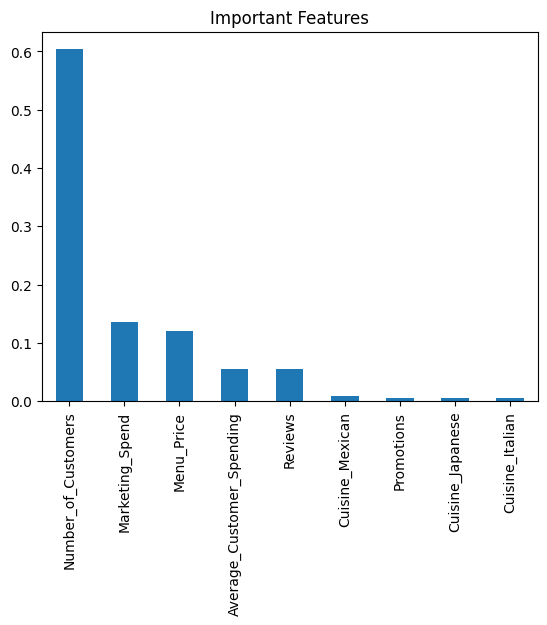

In [31]:
# Determine the important Features

important_features = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False).plot(kind='bar')
plt.title('Important Features')

### Feature Selection:
Key Features: 

a. Number_of_Customers

b. Marketing_spend

c. Menu_Price


Having identified the most important features:

1. We shall now drop the other unnecessary features.

2. Perfom a properly tuned Random Forest Regression Using RandomizedSearchCV.

3. Re-run The other models using the pruned features. 

4. Compare the RMSE and R2 score of the full features vs. the Pruned Features

In [32]:
rest_data.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,1,0


In [33]:
# 1. Prune features
pruned_cols = ['Average_Customer_Spending','Promotions', 'Reviews', 'Cuisine_Italian', 'Cuisine_Japanese', 'Cuisine_Mexican']

X_train_pruned = X_train.drop(columns=pruned_cols, axis=1)
X_test_pruned = X_test.drop(columns=pruned_cols, axis=1)


# 2. Tune the Random Forest Regression
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt']
}

# Initialize the RandomizedSearchCV model
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20, cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Train the tuned model on the pruned X training set
random_search.fit(X_train_pruned, y_train)
best_estimator = random_search.best_estimator_


# Make Predictions
rf_pred = random_search.predict(X_test_pruned)
rf_pred_train = random_search.predict(X_train_pruned)


# Evaluate the Model
r2_rf = r2_score(y_test, rf_pred)
r2_rf_train = r2_score(y_train, rf_pred_train)
mse_rf = mean_squared_error(y_test, rf_pred)
mse_rf_train = mean_squared_error(y_train, rf_pred_train)
rmse_rf = np.sqrt(mse_rf)
rmse_rf_train = np.sqrt(mse_rf_train)


print("Random Forest Regression Results (Pruned Features):")
print("Best Model (Tuned Random Forest):", best_estimator)
print("Mean Squared Error Test (Tuned Random Forest):", mse_rf)
print("Mean Squared Error Train (Tuned Random Forest):", mse_rf_train)
print("Root Mean Squared Error Test (Tuned Random Forest):", rmse_rf)
print("Root Mean Squared Error Train (Tuned Random Forest):", rmse_rf_train)
print("R-Squared Score Test (Tuned Random Forest):", r2_rf)
print("R-Squared Score Train (Tuned Random Forest):", r2_rf_train)

Random Forest Regression Results (Pruned Features):
Best Model (Tuned Random Forest): RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      random_state=42)
Mean Squared Error Test (Tuned Random Forest): 3982.8558022873617
Mean Squared Error Train (Tuned Random Forest): 1475.6142207504145
Root Mean Squared Error Test (Tuned Random Forest): 63.10987087839241
Root Mean Squared Error Train (Tuned Random Forest): 38.413724380101634
R-Squared Score Test (Tuned Random Forest): 0.6617357095129635
R-Squared Score Train (Tuned Random Forest): 0.8565549341490685


### vii. Gradient Boosting Regression

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [2, 4, 10] 
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


# Train the model
grid_search_gb.fit(X_train_pruned, y_train)


# Best Parameters
best_model = grid_search_gb.best_params_


# Make predictions
gradient_pred = grid_search_gb.predict(X_test_pruned)
gradient_pred_train = grid_search_gb.predict(X_train_pruned)


# Evaluate Models
r2_gradient = r2_score(y_test, gradient_pred)
r2_gradient_train = r2_score(y_train, gradient_pred_train)
mse_gradient = mean_squared_error(y_test, gradient_pred)
mse_gradient_train = mean_squared_error(y_train, gradient_pred_train)
rmse_gradient = np.sqrt(mse_gradient)
rmse_gradient_train = np.sqrt(mse_gradient_train)

print("Gradient Boosting Regression Model (on Pruned Features):")
print("Best Model (Gradient Boosting):", best_model)
print("R-Squared Score Test (Gradient Boosting):", r2_gradient)
print("R-Squared Score Train (Gradient Boosting):", r2_gradient_train)
print("Root Mean Squared Error Test (Gradient Boosting):", rmse_gradient)
print("Root Mean Squared Error Train (Gradient Boosting):", rmse_gradient_train)

Gradient Boosting Regression Model (on Pruned Features):
Best Model (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R-Squared Score Test (Gradient Boosting): 0.6920967968904019
R-Squared Score Train (Gradient Boosting): 0.7451134200913696
Root Mean Squared Error Test (Gradient Boosting): 60.21106632206097
Root Mean Squared Error Train (Gradient Boosting): 51.205556905821204


In [35]:
# Gradient Boost on Full Features

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [2, 4, 10] 
}

# Initialize GridSearchCV
grid_search_gboost = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


# Train the model
grid_search_gboost.fit(X_train, y_train)


# Best Parameters
best_model_gb = grid_search_gboost.best_params_


# Make predictions
gradient_b_pred = grid_search_gboost.predict(X_test)
gradient_b_pred_train = grid_search_gboost.predict(X_train)


# Evaluate Models
r2_gb = r2_score(y_test, gradient_b_pred)
r2_gb_train = r2_score(y_train, gradient_b_pred_train)
mse_gb = mean_squared_error(y_test, gradient_b_pred)
mse_gb_train = mean_squared_error(y_train, gradient_b_pred_train)
rmse_gb = np.sqrt(mse_gb)
rmse_gb_train = np.sqrt(mse_gb_train)

print("Gradient Boosting Regression Model (on Full Features):")
print("Best Model (Gradient Boosting):", best_model_gb)
print("R-Squared Score Test (Gradient Boosting):", r2_gb)
print("R-Squared Score Train (Gradient Boosting):", r2_gb_train)
print("Root Mean Squared Error Test (Gradient Boosting):", rmse_gb)
print("Root Mean Squared Error Train (Gradient Boosting):", rmse_gb_train)

Gradient Boosting Regression Model (on Full Features):
Best Model (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
R-Squared Score Test (Gradient Boosting): 0.6867832703745989
R-Squared Score Train (Gradient Boosting): 0.7592259503340316
Root Mean Squared Error Test (Gradient Boosting): 60.72837922293375
Root Mean Squared Error Train (Gradient Boosting): 49.76780051631121


#### viii. XGBoost Regressor

In [36]:
# XGBoost Boosting Regression with Hyperparameter tuning

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Set the options for parameters 
param_dist_x = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.05, 0.01, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_x,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train_pruned, y_train)

# Best Model
best_xgb = random_search_xgb.best_estimator_


# Make Predicitons
xgb_pred = random_search_xgb.predict(X_test_pruned)
xgb_pred_train = random_search_xgb.predict(X_train_pruned)


# Evaluate MOdel
r2_xgb = r2_score(y_test, xgb_pred)
r2_xgb_train = r2_score(y_train, xgb_pred_train)
mse_xgb = mean_squared_error(y_test, xgb_pred)
mse_xgb_train = mean_squared_error(y_train, xgb_pred_train)
rmse_xgb = np.sqrt(mse_xgb)
rmse_xgb_train = np.sqrt(mse_xgb_train)


print("XGBoost Regression Results:")
print("Best Model (XGBoost Regression):", best_xgb)
print("Mean Squared Error Test (XGBoost Regression):", mse_xgb)
print("Mean Square Error Train (XGBoost Regression):", mse_xgb_train)
print("Root Mean Square Error Test (XGBoost Regression):", rmse_xgb)
print("Root Mean Squared Error Train (XGBoost Regression):", rmse_xgb_train)
print("R-Squared Score Test (XGBoost Regression):", r2_xgb)
print("R-Squared Score Train (XGBoost Regression):", r2_xgb_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost Regression Results:
Best Model (XGBoost Regression): XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)
Mean Squared Error Test (XGBoost Regression): 3770.64938468774
Mean Square Error Train (XGBoost Regression): 2713.8576450248684
Root

In [37]:
# XGBoost on Full features

# Gradient Boosting Regression with Hyperparameter tuning

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Set the options for parameters 
param_dist_x = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.05, 0.01, 1.0],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

random_search_xgb_full = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_x,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_xgb_full.fit(X_train, y_train)

# Best Model
best_xgboost = random_search_xgb_full.best_estimator_


# Make Predicitons
xgb_reg_pred = random_search_xgb_full.predict(X_test)
xgb_reg_pred_train = random_search_xgb_full.predict(X_train)


# Evaluate Model
r2_xgboost = r2_score(y_test, xgb_reg_pred)
r2_xgboost_train = r2_score(y_train, xgb_reg_pred_train)
mse_xgboost = mean_squared_error(y_test, xgb_reg_pred)
mse_xgboost_train = mean_squared_error(y_train, xgb_reg_pred_train)
rmse_xgboost = np.sqrt(mse_xgboost)
rmse_xgboost_train = np.sqrt(mse_xgboost_train)


print("XGBoost Regression Results (Full Features):")
print("Best Model (XGBoost Regression):", best_xgboost)
print("Mean Squared Error Test (XGBoost Regression):", mse_xgboost)
print("Mean Square Error Train (XGBoost Regression):", mse_xgboost_train)
print("Root Mean Square Error Test (XGBoost Regression):", rmse_xgboost)
print("Root Mean Squared Error Train (XGBoost Regression):", rmse_xgboost_train)
print("R-Squared Score Test (XGBoost Regression):", r2_xgboost)
print("R-Squared Score Train (XGBoost Regression):", r2_xgboost_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost Regression Results (Full Features):
Best Model (XGBoost Regression): XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)
Mean Squared Error Test (XGBoost Regression): 3753.3266631805836
Mean Square Error Train (XGBoost Regression): 2556.

In [38]:
# Re-running the other models on the Pruned features
# 1. Linear Regression
linear_model_p = LinearRegression()

## Fit the model
linear_model_p.fit(X_train_pruned, y_train)

## Make predictions
lm_pred = linear_model_p.predict(X_test_pruned)
lm_pred_train = linear_model_p.predict(X_train_pruned)

## Evaluate the Linear model on pruned features
r2_lm = r2_score(y_test, lm_pred)
r2_lm_train = r2_score(y_train, lm_pred_train)
mse_lm = mean_squared_error(y_test, lm_pred)
mse_lm_train = mean_squared_error(y_train, lm_pred_train)
rmse_lm = np.sqrt(mse_lm)
rmse_lm_train = np.sqrt(mse_lm_train)
lm_pruned_coefficients = linear_model_p.coef_
lm_pruned_intercept = linear_model_p.intercept_

print("Pruned Results - Linear Regression Model:")
print("Linear Model Pruned Coefficients:", lm_pruned_coefficients)
print("Linear Model Intercept:", lm_pruned_intercept)
print("Mean Squared Error Test (Pruned Linear Model):", mse_lm)
print("Mean Squared Error Train (Pruned Linear Model):", mse_lm_train)
print("Root Mean Squared Error Test (Pruned Linear Model):", rmse_lm)
print("Root Mean Squared Error Train (Pruned Linear Model):", rmse_lm_train)
print("R-Squared Score Test (Pruned Linear Model):", r2_lm)
print("R-Squared Score Train (Pruned Linear Model):", r2_lm_train)


Pruned Results - Linear Regression Model:
Linear Model Pruned Coefficients: [2.86666295 2.04229667 4.89507097]
Linear Model Intercept: 5.9427561178767405
Mean Squared Error Test (Pruned Linear Model): 3550.222016267025
Mean Squared Error Train (Pruned Linear Model): 3316.076937838956
Root Mean Squared Error Test (Pruned Linear Model): 59.583739529061326
Root Mean Squared Error Train (Pruned Linear Model): 57.58538823207634
R-Squared Score Test (Pruned Linear Model): 0.698479334673795
R-Squared Score Train (Pruned Linear Model): 0.6776427957754683


In [39]:
# 2. RidgeCV Regression
scaler = StandardScaler()

## Scale the pruned features
X_train_scaled_p = scaler.fit_transform(X_train_pruned)
X_test_scaled_p = scaler.transform(X_test_pruned)

## Define the lambda options
alphas= np.logspace(-3, 2, 100)

## Train the model
ridgecv_p = RidgeCV(alphas=alphas, cv=5)
ridgecv_p.fit(X_train_scaled_p, y_train)


## Make Predicitons
ridge_pred_p = ridgecv_p.predict(X_test_scaled_p)
ridge_pred_p_train = ridgecv_p.predict(X_train_scaled_p)


## Evaluate Ridge Model on Pruned features
r2_ridgecv = r2_score(y_test, ridge_pred_p)
r2_ridgecv_train = r2_score(y_train, ridge_pred_p_train)
mse_ridgecv = mean_squared_error(y_test, ridge_pred_p)
mse_ridgecv_train = mean_squared_error(y_train, ridge_pred_p_train)
rmse_ridgecv = np.sqrt(mse_ridgecv)
rmse_ridgecv_train = np.sqrt(mse_ridgecv_train)

print("Pruned Results - RidgeCV Regression Model:")
print("RidgeCV Model Pruned Coefficients:", ridgecv_p.coef_)
print("RidgeCV Model Intercept:", ridgecv_p.intercept_)
print("Mean Squared Error Test (Pruned RidgeCV Model):", mse_ridgecv)
print("Mean Squared Error Train (Pruned RidgeCV Model):", mse_ridgecv_train)
print("Root Mean Squared Error Test (Pruned RidgeCV Model):", rmse_ridgecv)
print("Root Mean Squared Error Train (Pruned RidgeCV Model):", rmse_ridgecv_train)
print("R-Squared Score Test (Pruned RidgeCV Model):", r2_ridgecv)
print("R-Squared Score Train (Pruned RidgeCV Model):", r2_ridgecv_train)

Pruned Results - RidgeCV Regression Model:
RidgeCV Model Pruned Coefficients: [74.04920339 23.03737854 28.36247956]
RidgeCV Model Intercept: 269.65913851209757
Mean Squared Error Test (Pruned RidgeCV Model): 3556.020773723516
Mean Squared Error Train (Pruned RidgeCV Model): 3316.5990870076776
Root Mean Squared Error Test (Pruned RidgeCV Model): 59.632380245329095
Root Mean Squared Error Train (Pruned RidgeCV Model): 57.589921748580956
R-Squared Score Test (Pruned RidgeCV Model): 0.6979868456975182
R-Squared Score Train (Pruned RidgeCV Model): 0.6775920374398288


In [40]:
# 3. LassoCV Regression
## pruned features have already been scaled
## lambda options have been defined
## Initialize and train the model
lassocv_p = LassoCV(alphas=alphas, random_state=42, cv=5, n_jobs=-1)
lassocv_p.fit(X_train_scaled_p, y_train)

## Make predictions
lasso_pred_p =  lassocv_p.predict(X_test_scaled_p)
lasso_pred_p_train = lassocv_p.predict(X_train_scaled_p)

## Evaluate Lasso Model
r2_lassocv = r2_score(y_test, lasso_pred_p)
r2_lassocv_train = r2_score(y_train, lasso_pred_p_train)
mse_lassocv = mean_squared_error(y_test, lasso_pred_p)
mse_lassocv_train = mean_squared_error(y_train, lasso_pred_p_train)
rmse_lassocv = np.sqrt(mse_lassocv)
rmse_lassocv_train = np.sqrt(mse_lassocv_train)


print("Pruned Results - LassoCV Regression Model:")
print("LassoCV Model Pruned Coefficients:", lassocv_p.coef_)
print("LassoCV Model Intercept:", lassocv_p.intercept_)
print("Mean Squared Error Test (Pruned LassoCV Model):", mse_lassocv)
print("Mean Squared Error Train (Pruned LassoCV Model):", mse_lassocv_train)
print("Root Mean Squared Error Test (Pruned LassoCV Model):", rmse_lassocv)
print("Root Mean Squared Error Train (Pruned LassoCV Model):", rmse_lassocv_train)
print("R-Squared Score Test (Pruned LassoCV Model):", r2_lassocv)
print("R-Squared Score Train (Pruned LassoCV Model):", r2_lassocv_train)


Pruned Results - LassoCV Regression Model:
LassoCV Model Pruned Coefficients: [74.69866196 23.21279648 28.62025546]
LassoCV Model Intercept: 269.65913851209757
Mean Squared Error Test (Pruned LassoCV Model): 3550.231999606806
Mean Squared Error Train (Pruned LassoCV Model): 3316.076940775865
Root Mean Squared Error Test (Pruned LassoCV Model): 59.58382330470919
Root Mean Squared Error Train (Pruned LassoCV Model): 57.58538825757681
R-Squared Score Test (Pruned LassoCV Model): 0.698478486787877
R-Squared Score Train (Pruned LassoCV Model): 0.6776427954899702


In [41]:
# 4. Decision Tree Regression
## features have been scaled

## Hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [2, 4, 10],
    'min_samples_split': [2, 5, 10]
}

## Initialize GridSearchCV
gridsearch_dt_pruned = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

## Train model
decisiontree_model = gridsearch_dt_pruned.fit(X_train_scaled_p, y_train)


## Make predicitons
dt_pred = decisiontree_model.predict(X_test_scaled_p)
dt_pred_train = decisiontree_model.predict(X_train_scaled_p)

# Best Estimator
best_dt_model = gridsearch_dt_pruned.best_estimator_

# Evaluate Model
r2_decisiontree = r2_score(y_test, dt_pred)
r2_decisiontree_train = r2_score(y_train, dt_pred_train)
mse_decisiontree = mean_squared_error(y_test, dt_pred)
mse_decisiontree_train = mean_squared_error(y_train, dt_pred_train)
rmse_decisiontree = np.sqrt(mse_decisiontree)
rmse_decisiontree_train = np.sqrt(mse_decisiontree_train)


print("Pruned Results - Decision Tree Regression Model:")
print("Decision Tree Model Important Features:", best_dt_model.feature_importances_)
print("Feature Names:", X_train_pruned.columns.tolist())
print("Mean Squared Error Test (Pruned Decision Tree Model):", mse_decisiontree)
print("Mean Squared Error Train (Pruned Decision Tree Model):", mse_decisiontree_train)
print("Root Mean Squared Error Test (Pruned Decision Tree Model):", rmse_decisiontree)
print("Root Mean Squared Error Train (Pruned Decision Tree Model):", rmse_decisiontree_train)
print("R-Squared Score Test (Pruned Decision Tree Model):", r2_decisiontree)
print("R-Squared Score Train (Pruned Decision Tree Model):", r2_decisiontree_train)

Pruned Results - Decision Tree Regression Model:
Decision Tree Model Important Features: [0.76552807 0.10170723 0.1327647 ]
Feature Names: ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend']
Mean Squared Error Test (Pruned Decision Tree Model): 4454.702327232763
Mean Squared Error Train (Pruned Decision Tree Model): 2707.5032329842124
Root Mean Squared Error Test (Pruned Decision Tree Model): 66.74355644729133
Root Mean Squared Error Train (Pruned Decision Tree Model): 52.033674029268894
R-Squared Score Test (Pruned Decision Tree Model): 0.6216617430169216
R-Squared Score Train (Pruned Decision Tree Model): 0.7368024961500281


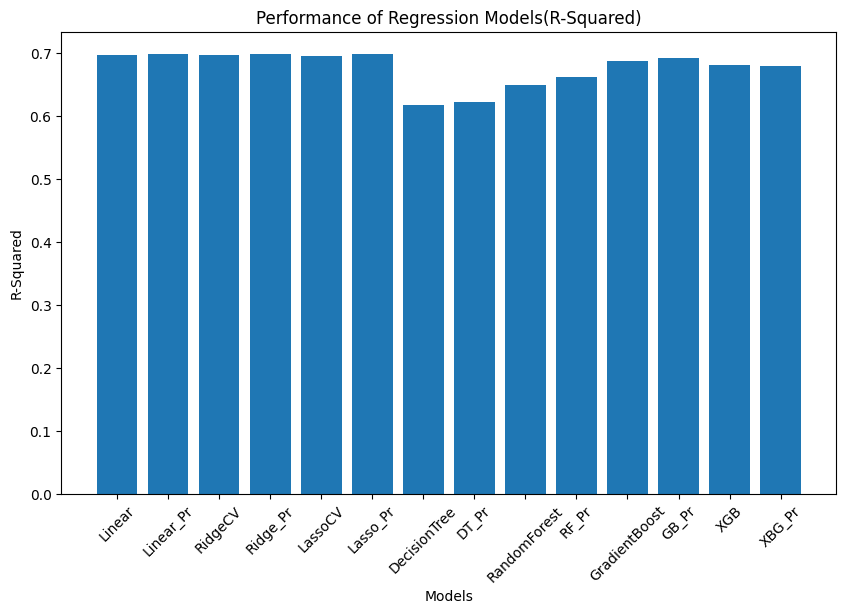

In [42]:
# 4. Compare the r2 score of all the models to determine the most accurate
## a. Compare the full features vs. the pruned features for all models (r2 and rmse)## a. Compare the full features vs. the pruned features (r2)

# Create a list of the models

model_names = ['Linear', 'Linear_Pr', 'RidgeCV', 'Ridge_Pr', 'LassoCV', 'Lasso_Pr', 'DecisionTree', 'DT_Pr', 'RandomForest', 'RF_Pr', 'GradientBoost', 'GB_Pr', 'XGB', 'XBG_Pr']

# List of r2 Values
r2_values = [r2_linear, r2_lm, r2_ridge, r2_ridgecv, r2_lasso, r2_lassocv, r2_dt, r2_decisiontree, r2_random_forest, r2_rf, r2_gb, r2_gradient, r2_xgboost, r2_xgb]


# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values)
plt.xlabel('Models')
plt.ylabel('R-Squared')
plt.title('Performance of Regression Models(R-Squared)')
plt.xticks(rotation=45)
plt.show()

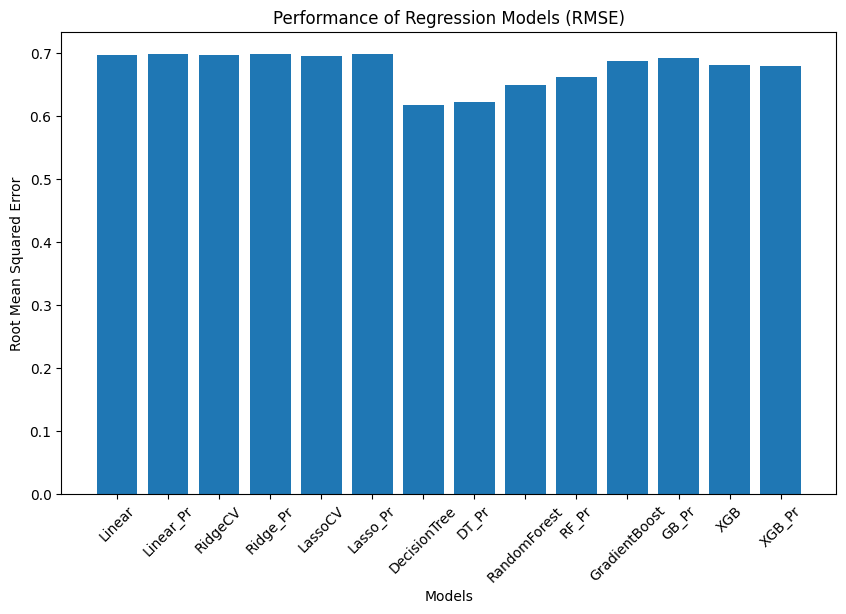

In [43]:
## b. Compare the full features vs. the pruned features (rmse)

# Create a list of the models

model_names = ['Linear', 'Linear_Pr', 'RidgeCV', 'Ridge_Pr', 'LassoCV', 'Lasso_Pr', 'DecisionTree', 'DT_Pr', 'RandomForest', 'RF_Pr', 'GradientBoost', 'GB_Pr', 'XGB', 'XGB_Pr']

# List of RMSE values 
rmse_values = [rmse_linear, rmse_lm, rmse_ridge, rmse_ridgecv, rmse_lasso, rmse_lassocv, rmse_dt, rmse_decisiontree, rmse_random_forest, rmse_rf, rmse_gb, rmse_gradient, rmse_xgboost, rmse_xgb]


# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.title('Performance of Regression Models (RMSE)')
plt.xticks(rotation=45)
plt.show()

#### Insights
1. Pruning the model did not really improve the performance of the models; Linear, Lasso and Ridge had similar r2 score for the full features and the pruned features. While the models on pruned features for random forest and decision trees models perfromed marginally better. 

2. The Results of the Linear, Ridge and Lasso Models on the full and pruned features are very similar; returning RMSE ~60 but considering the robustness, Gradient Boosting and XGBoost, scoring very similar results as the Linear, Ridge and Lasso, are more suitable for predicting the Monthly revenue.


C:\Users\JEETECH\AppData\Local\Temp\ipykernel_29668\2802312830.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_gb, X_test, plot_type="bar", show=False)


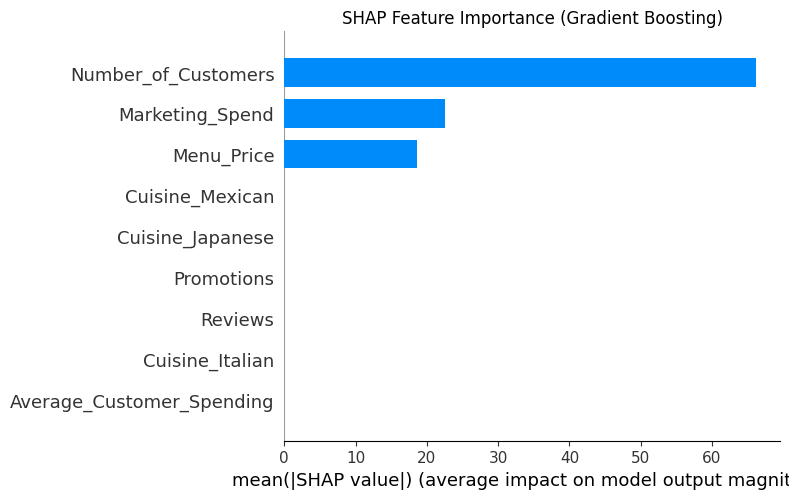

In [44]:
# SHAP for Gradient Boosting (Full Features)
import shap

best_model_gboost = grid_search_gb.best_estimator_

explainer_gb = shap.TreeExplainer(best_model_gboost)
shap_values_gb = explainer_gb.shap_values(X_test)


shap.summary_plot(shap_values_gb, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Gradient Boosting)")
plt.tight_layout()
plt.show()


In [45]:
# Performance of each Model

results_overview = pd.DataFrame({
    'Model': ['Linear', 'RidgeCV', 'LassoCV', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XGBoost'],
    'R_Squared_Full': [0.697, 0.696, 0.695, 0.616, 0.640, 0.692, 0.688],
    'RMSE_Full': [59.71, 59.77, 59.83, 67.17, 64.31, 60.72, 61.26],
    'R_Squared_Pruned': [0.695, 0.694, 0.698, 0.621, 0.667, 0.695, 0.679],
    'RMSE_Pruned': [59.58, 59.63, 59.58, 66.74, 63.10, 60.21, 61.40]
})
results_overview 

,Model,R_Squared_Full,RMSE_Full,R_Squared_Pruned,RMSE_Pruned
0,Linear,0.697,59.71,0.695,59.58
1,RidgeCV,0.696,59.77,0.694,59.63
2,LassoCV,0.695,59.83,0.698,59.58
3,Decision Tree,0.616,67.17,0.621,66.74
4,Random Forest,0.640,64.31,0.667,63.10
5,Gradient Boost,0.692,60.72,0.695,60.21
6,XGBoost,0.688,61.26,0.679,61.40


C:\Users\JEETECH\AppData\Local\Temp\ipykernel_29668\3874783498.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lasso, X_test_scaled_df, plot_type="bar", show=False)


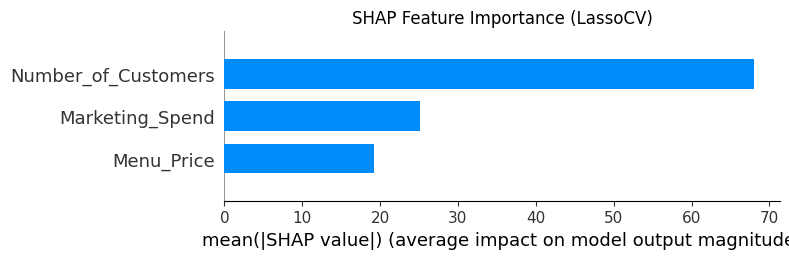

In [46]:
# SHAP for LassoCV (Pruned Features)
import shap

# Convert the scaled data back to a dataframe 
# Scale the pruned data and convert it to a convert the scaled 
scaler = StandardScaler()
X_train_scaled_df = pd.DataFrame(X_train_scaled_p, columns=X_train_pruned.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled_p, columns=X_test_pruned.columns)

# Fit the Lasso model
lasso_model = lassocv_p

# Initialize the SHAP explainer
lasso_explainer = shap.LinearExplainer(lasso_model, X_train_scaled_df)
shap_values_lasso = lasso_explainer.shap_values(X_test_scaled_df)


shap.summary_plot(shap_values_lasso, X_test_scaled_df, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (LassoCV)")
plt.tight_layout()
plt.show()

C:\Users\JEETECH\AppData\Local\Temp\ipykernel_29668\3520506401.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lasso, X_test_scaled_df, show=False)


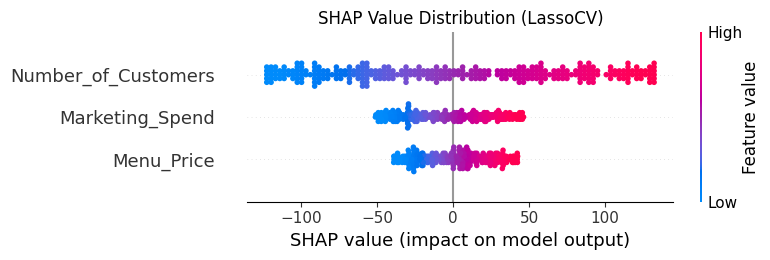

In [47]:
# Summary Plot (Beeswarm)
shap.summary_plot(shap_values_lasso, X_test_scaled_df, show=False)
plt.title("SHAP Value Distribution (LassoCV)")
plt.tight_layout()
plt.show()

In [48]:
# Get the mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values_lasso).mean(axis=0)


# Create a Dataframe to make it readable
feature_impact = pd.DataFrame({
    'Feature': X_test_scaled_df.columns,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print(feature_impact)

               Feature  Mean_Abs_SHAP
0  Number_of_Customers      67.971110
2      Marketing_Spend      25.106658
1           Menu_Price      19.248639


In [49]:
# Now to understand the true value of each features coefficients
# We confirm the value of scaled coefficients and then the value of the unscaled coefficients for key features

# Scaled  coefficients
lasso_coef = lassocv_p.coef_

scaled_lasso_coef = pd.DataFrame({
    'Features': X_train_pruned.columns,
    'Coefficient': lasso_coef
})

print("Scaled LassoCV Coefficients:")
scaled_lasso_coef


Scaled LassoCV Coefficients:


,Features,Coefficient
0,Number_of_Customers,74.698662
1,Menu_Price,23.212796
2,Marketing_Spend,28.620255


In [50]:
# Unscaled coefficients

X_stds = X_train_pruned.std(ddof=0)

true_coef = lassocv_p.coef_ / X_stds.values

true_lasso_coef = pd.DataFrame({
    'Feature': X_train_pruned.columns,
    'True Coefficient': true_coef
}).sort_values(by='True Coefficient', ascending=False)

print("Unscaled LassoCV Coefficients:")
true_lasso_coef

Unscaled LassoCV Coefficients:


,Feature,True Coefficient
2,Marketing_Spend,4.894901
0,Number_of_Customers,2.866625
1,Menu_Price,2.042214


## Conclusion:

#### a. Data Analysis Highlights:
* Japanese cuisine is the top performer across the board and these results were achieved with minimal use of promotions suggesting organic demand.

* Japanese cuisine had the highest marketing spend ($2,700) suggesting that although the dishes did not have promotions attached to sales, investments were made in marketing Japanese dishes. 

* Promotions had a marginal impact on revenue, especially for Italian and Mexican dishes; the numbers suggest the superiority of marketing expenditure in driving sales. 

* Marketing spend is more effective at the macro-level (increased expenditure boosts revenue),  but shows diminishing returns at the micro-level.



#### b. What models worked best?:
After testing multiple regression models (Linear, RidgeCV, LassoCV, Decision Tree, Random Forest, Gradient Boost and XGBoost), the most accurate model, was the LassoCV on the Pruned features (most important features) recording an r2 score of 0.698 (69.8%)  and an RMSE of [*$59.6*] on the test set.


#### c. Most important features:
Model-based feature selection and SHAP analysis revealed that the Number of Customers, Menu Price, and Marketing Spend were the strongest predictors of Monthly Revenue. Notably, while Menu Price and Marketing Spend showed weak linear correlations with monthly revenue, their interaction effects and non-linear influence were captured by tree-based models and the Lassocv model.


#### d. Insights
Although our scaled LassoCV model emphasized the impact of important features in standard deviation units, our unscaled true coefficients reveal that:

a. For every $1 increase in marketing spend, there is an increase of $4.89 in monthly revenue.

b. For every new customer who patronizes the restaurant, monthly revenue increases by $2.87


An increase in marketing spend could drive increase in customer base which together enhance monthly revenue inflows.

It is important to distinguish correlation from causation; while some features show strong correlation with monthly revenue, this does not mean that they are the true drivers. Given the limitations of the data, other factors driving revenue may be at play that weren't captured by the dataset, and we cannot conclusively determine causality.

### Recommendations:

1. Focus marketing budget on high-performing cuisines like Japanese dishes.

2. Use promotions to boost revenue from Italian and Mexican dishes.

3. Review menu pricing for high-performing dishes to maximize average customer spend. Consider adding complimentary items like drinks at a slight discount to encourage increased customer spend.
